<a href="https://colab.research.google.com/github/csaatechnicalarts/ML_Bootcamp/blob/main/DnD5e_Monsters_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [292]:
import pandas as pd
import matplotlib.pyplot as plt

In [293]:
df = pd.read_csv('sample_data/DnD5e_monsters_cleaned.csv')
df.head()

,Name,Size,HP,Speed,Race,Alignment,Challenge,XP,Armor_Class,Armor_Info
0,Aboleth,Large,135 (18d10+36),"10 ft., swim 40 ft.",aberration,Lawful Evil,10,5900,17,Natural Armor
1,Acolyte,Medium,9 (2d8),30 ft.,humanoid (any race),Any Alignment,1/4,50,10,Natural Armor
2,Adult Black Dragon,Huge,195 (17d12+85),"40 ft., fly 80 ft., swim 40 ft.",dragon,Chaotic Evil,14,11500,19,Natural Armor
3,Adult Blue Dragon,Huge,225 (18d12+108),"40 ft., burrow 30 ft., fly 80 ft.",dragon,Lawful Evil,16,15000,19,Natural Armor
4,Adult Brass Dragon,Huge,172 (15d12+75),"40 ft., burrow 40 ft., fly 80 ft.",dragon,Chaotic Good,13,10000,18,Natural Armor


In [294]:
ave_xp = df['XP'].mean()
ave_xp.astype(int)

np.int64(4200)

In [295]:
df['Size'].unique()

array(['Large', 'Medium', 'Huge', 'Gargantuan', 'Small', 'Tiny'],
      dtype=object)

In [296]:
df_size_large = df[df['Size'] == 'Large']
df_size_medium = df[df['Size'] == 'Medium']
df_size_huge = df[df['Size'] == 'Huge']

In [297]:
df_size_large_alignment_total_xp = df_size_large.groupby('Alignment')['XP'].sum()
df_size_large_alignment_total_xp

,XP
Alignment,
Chaotic Evil,62500
Chaotic Good,12850
Chaotic Neutral,3900
Lawful Evil,74850
Lawful Good,70500
Lawful Neutral,25200
Neutral,9050
Neutral Evil,5750
Neutral Good,650


In [298]:
df_size_medium_alignment_total_xp = df_size_medium.groupby('Alignment')['XP'].sum()
df_size_medium_alignment_total_xp

,XP
Alignment,
Any,1800
Any Alignment,16335
Any Chaotic Alignment,450
Any Evil Alignment,33000
Any Non-good Alignment,4475
Any Non-lawful Alignment,475
Chaotic Evil,5150
Chaotic Good,400
Chaotic Neutral,100


In [299]:
df_size_huge_alignment_total_xp = df_size_huge.groupby('Alignment')['XP'].sum()
df_size_huge_alignment_total_xp

,XP
Alignment,
Chaotic Evil,63300
Chaotic Good,36500
Lawful Evil,33000
Lawful Good,46000
Neutral,2900
Neutral Evil,11100
Neutral Good (50%) Or Neutral Evil (50%),5000
Unaligned,28750


In [300]:
plt.figure(figsize=(5,3))

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

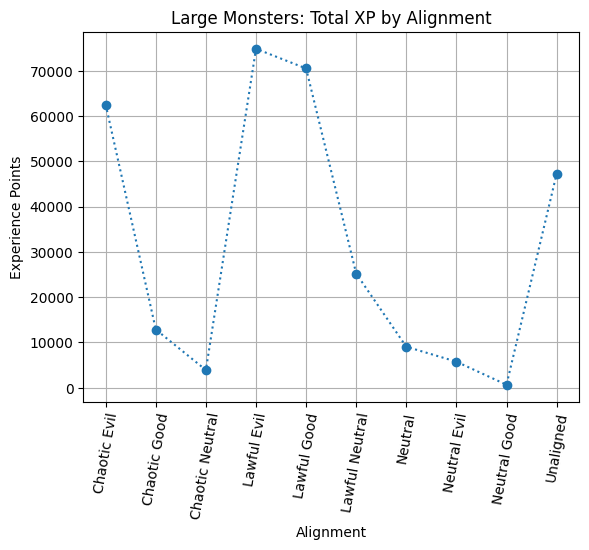

In [301]:
plt.plot(df_size_large_alignment_total_xp.index, df_size_large_alignment_total_xp.values, marker='o', linestyle=':')
plt.title('Large Monsters: Total XP by Alignment')
plt.xlabel('Alignment')
plt.ylabel('Experience Points')
plt.grid(True)
plt.xticks(rotation=80)
plt.show()

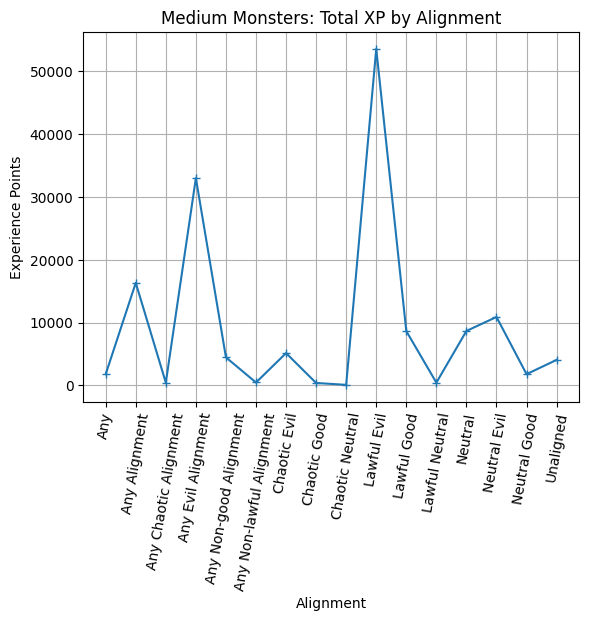

In [302]:
plt.plot(df_size_medium_alignment_total_xp.index, df_size_medium_alignment_total_xp.values, marker='+', linestyle='-')
plt.title('Medium Monsters: Total XP by Alignment')
plt.xlabel('Alignment')
plt.ylabel('Experience Points')
plt.grid(True)
plt.xticks(rotation=80)
plt.show()

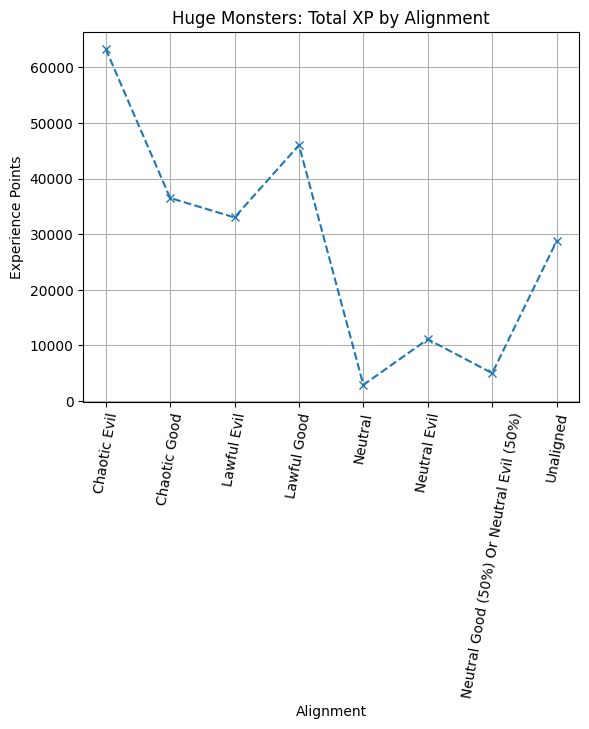

In [303]:
plt.plot(df_size_huge_alignment_total_xp.index, df_size_huge_alignment_total_xp.values, marker='x', linestyle='--')
plt.title('Huge Monsters: Total XP by Alignment')
plt.xlabel('Alignment')
plt.ylabel('Experience Points')
plt.grid(True)
plt.xticks(rotation=80)
plt.show()

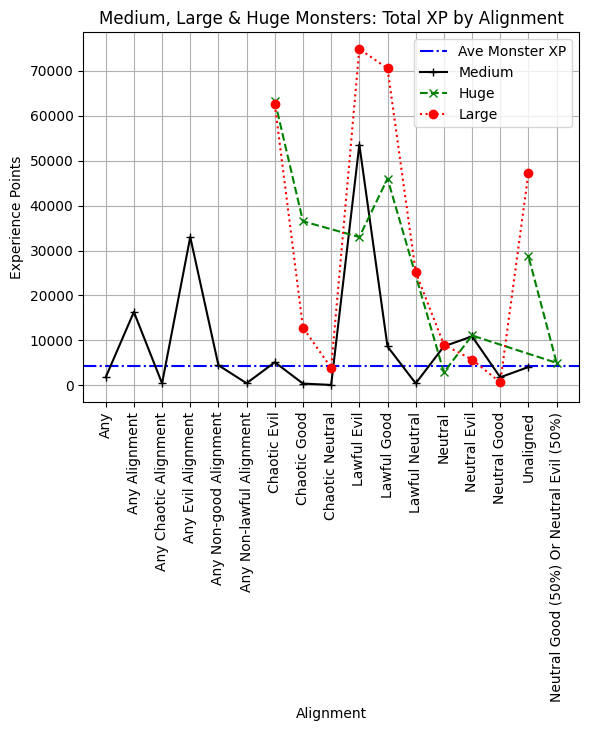

In [306]:
plt.axhline(y=ave_xp, color='blue', linestyle='-.', label='Ave Monster XP')
plt.plot(df_size_medium_alignment_total_xp.index, df_size_medium_alignment_total_xp.values, marker='+',
         linestyle='-', color="black", label="Medium")
plt.plot(df_size_huge_alignment_total_xp.index, df_size_huge_alignment_total_xp.values, marker='x',
         linestyle='--', color="green", label="Huge")
plt.plot(df_size_large_alignment_total_xp.index, df_size_large_alignment_total_xp.values, marker='o',
         linestyle=':', color='red', label="Large")
plt.legend()
plt.title('Medium, Large & Huge Monsters: Total XP by Alignment')
plt.xlabel('Alignment')
plt.ylabel('Experience Points')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()